# EXL Mortgage Case Study

This code is only for capability demonstration and is not intented to be 100% fine tuned. The algorithm demonstrated is Logistic Regression, however, better results could be obtained by other Classification algorithms as well. Offcourse, the accuracy of this model can be improved by fine tuning the data discrepencies and outlier removal

**Importing libs**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

** Reading the case study data from pandas**


In [155]:
data = pd.read_excel(r'C:/Users/jayan/Downloads/Case Study Data.xlsx', sheet_name='Data')

** Keeping Specific Columns for Demonstration Purposes only

In [156]:
data= pd.DataFrame(data[['PPI','Credit_Score','Credit Score Category' ,'Final_Grade','Term','Term Category','Net_Advance','Loan_Type','Time_at_Address','Residential_Status','Number_of_Dependants','Marital_Status','Gender','Time_in_Employment','Employment_Status','Income_Range','ACCESS_Card','VISA_Card','American_Express','Diners_Card','Cheque_Guarantee','Time_with_Bank','Value_of_Property','Outstanding_Mortgage_Bal']])

In [157]:
data.head(10)

,PPI,Credit_Score,Credit Score Category,Final_Grade,Term,Term Category,Net_Advance,Loan_Type,Time_at_Address,Residential_Status,...,Employment_Status,Income_Range,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal
0,0,918,601-1000,A,36,0-60,3000.0,UnSecured,132,H,...,S,6,False,False,False,False,TRUE,168,178000,47679
1,1,903,601-1000,A,120,60-120,21000.0,secured,288,H,...,R,2,False,True,False,False,TRUE,300,180000,11563
2,1,1060,>1000,X,78,60-120,7200.0,secured,276,H,...,P,5,False,True,False,False,TRUE,369,199000,17563
3,1,839,601-1000,B,60,0-60,8000.0,UnSecured,48,R,...,G,6,False,True,False,False,TRUE,216,120000,0
4,1,1057,>1000,X,60,0-60,7650.0,UnSecured,156,H,...,S,6,True,False,False,False,TRUE,510,180000,60101
5,1,913,601-1000,A,120,60-120,33000.0,secured,18,H,...,P,6,False,True,False,False,TRUE,240,205000,166543
6,1,840,601-1000,B,60,0-60,8000.0,UnSecured,293,H,...,P,6,True,True,False,False,TRUE,317,179000,78823
7,0,961,601-1000,X,60,0-60,5300.0,secured,163,H,...,P,6,False,False,False,False,TRUE,243,92000,73386
8,1,901,601-1000,A,60,0-60,12000.0,UnSecured,108,H,...,P,6,True,True,True,False,TRUE,180,180000,149254
9,1,915,601-1000,A,60,0-60,6000.0,UnSecured,36,T,...,D,2,True,True,False,False,TRUE,384,120000,0


**We are just exploring the data**


In [158]:
data.shape

(16383, 24)

**shows about details**

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PPI                       16383 non-null  int64  
 1   Credit_Score              16383 non-null  int64  
 2   Credit Score Category     16383 non-null  object 
 3   Final_Grade               16383 non-null  object 
 4   Term                      16383 non-null  int64  
 5   Term Category             16383 non-null  object 
 6   Net_Advance               16383 non-null  float64
 7   Loan_Type                 16383 non-null  object 
 8   Time_at_Address           16383 non-null  int64  
 9   Residential_Status        16383 non-null  object 
 10  Number_of_Dependants      16383 non-null  int64  
 11  Marital_Status            16383 non-null  object 
 12  Gender                    16383 non-null  object 
 13  Time_in_Employment        16383 non-null  int64  
 14  Employ

**we are checking object columns**

In [160]:
data.select_dtypes(include= 'object').columns

Index(['Credit Score Category', 'Final_Grade', 'Term Category', 'Loan_Type',
       'Residential_Status', 'Marital_Status', 'Gender', 'Employment_Status',
       'Cheque_Guarantee'],
      dtype='object')

**using len() function to check object columns length**

In [161]:
len(data.select_dtypes(include = 'object').columns)

9

In [162]:
data.select_dtypes(include = ['int64','float64']).columns

Index(['PPI', 'Credit_Score', 'Term', 'Net_Advance', 'Time_at_Address',
       'Number_of_Dependants', 'Time_in_Employment', 'Income_Range',
       'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal'],
      dtype='object')

In [163]:
len(data.select_dtypes(include= ['int','float64']).columns)

11

# statistical summary

In [164]:
data.describe()

,PPI,Credit_Score,Term,Net_Advance,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,1.638300e+04
mean,0.577489,882.061832,59.142892,7364.007758,120.488128,0.808460,103.096075,4.408716,194.491119,1.663663e+05,7.006096e+04
std,0.493974,93.149605,26.689123,6673.343595,109.192185,1.118947,91.541972,1.668857,107.144729,1.187209e+05,8.302773e+04
min,0.000000,352.000000,6.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00
25%,0.000000,818.000000,48.000000,3000.000000,38.000000,0.000000,38.000000,3.000000,120.000000,1.200000e+05,0.000000e+00
50%,1.000000,882.000000,60.000000,5300.000000,84.000000,0.000000,72.000000,5.000000,181.000000,1.250000e+05,6.000000e+04
75%,1.000000,947.000000,60.000000,9000.000000,180.000000,1.000000,144.000000,6.000000,252.000000,1.900000e+05,1.076985e+05
max,1.000000,1295.000000,300.000000,75000.000000,864.000000,30.000000,600.000000,6.000000,756.000000,3.300000e+06,3.505442e+06


In [165]:
data.columns

Index(['PPI', 'Credit_Score', 'Credit Score Category', 'Final_Grade', 'Term',
       'Term Category', 'Net_Advance', 'Loan_Type', 'Time_at_Address',
       'Residential_Status', 'Number_of_Dependants', 'Marital_Status',
       'Gender', 'Time_in_Employment', 'Employment_Status', 'Income_Range',
       'ACCESS_Card', 'VISA_Card', 'American_Express', 'Diners_Card',
       'Cheque_Guarantee', 'Time_with_Bank', 'Value_of_Property',
       'Outstanding_Mortgage_Bal'],
      dtype='object')

# Dealing with missing values

if in our data have some null value then output'True', either not then output'False'

In [166]:
data.isnull().values.any()

False

In [167]:
data.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [168]:
data.isnull().values.sum()

0

In [169]:
data.shape

(16383, 24)

**one hot encoding technique One-hot encoding is used to convert categorical variables into a format that can be readily used by machine learning algorithms. The basic idea of one-hot encoding is to create new variables that take on values 0 and 1 to represent the original categorical values.

In [170]:
data = pd.get_dummies(data = data , drop_first = True)
data.head()

,PPI,Credit_Score,Term,Net_Advance,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,ACCESS_Card,VISA_Card,...,Employment_Status_G,Employment_Status_H,Employment_Status_M,Employment_Status_P,Employment_Status_R,Employment_Status_S,Employment_Status_T,Employment_Status_U,Cheque_Guarantee_FALS,Cheque_Guarantee_TRUE
0,0,918,36,3000.0,132,0,288,6,False,False,...,0,0,0,0,0,1,0,0,0,1
1,1,903,120,21000.0,288,0,37,2,False,True,...,0,0,0,0,1,0,0,0,0,1
2,1,1060,78,7200.0,276,0,154,5,False,True,...,0,0,0,1,0,0,0,0,0,1
3,1,839,60,8000.0,48,0,82,6,False,True,...,1,0,0,0,0,0,0,0,0,1
4,1,1057,60,7650.0,156,2,342,6,True,False,...,0,0,0,0,0,1,0,0,0,1


# Countplot 

C:\Users\jayan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PPI', ylabel='count'>

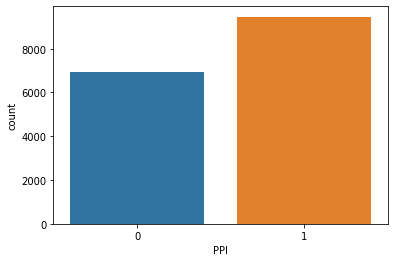

In [171]:
sns.countplot(data['PPI'],label = 'count')

In [172]:
#  0 for present
(data.PPI == 0).sum()

6922

In [173]:
# 1 for not present
(data.PPI == 1).sum()

9461

# correlation matrix and heatmap
* **highly correlated means 1 and not average below means 0 **

In [174]:
data2 = data.drop(columns = 'PPI')
data2.head()

,Credit_Score,Term,Net_Advance,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,ACCESS_Card,VISA_Card,American_Express,...,Employment_Status_G,Employment_Status_H,Employment_Status_M,Employment_Status_P,Employment_Status_R,Employment_Status_S,Employment_Status_T,Employment_Status_U,Cheque_Guarantee_FALS,Cheque_Guarantee_TRUE
0,918,36,3000.0,132,0,288,6,False,False,False,...,0,0,0,0,0,1,0,0,0,1
1,903,120,21000.0,288,0,37,2,False,True,False,...,0,0,0,0,1,0,0,0,0,1
2,1060,78,7200.0,276,0,154,5,False,True,False,...,0,0,0,1,0,0,0,0,0,1
3,839,60,8000.0,48,0,82,6,False,True,False,...,1,0,0,0,0,0,0,0,0,1
4,1057,60,7650.0,156,2,342,6,True,False,False,...,0,0,0,0,0,1,0,0,0,1


<AxesSubplot:title={'center':'correlated with Exited'}>

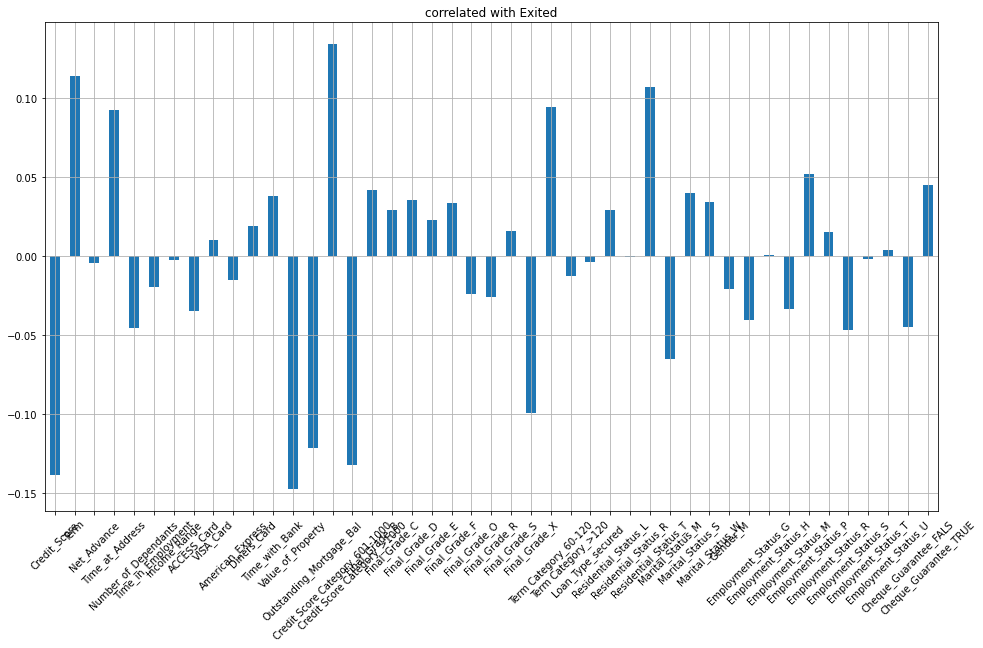

In [175]:
data2.corrwith(data['PPI']).plot.bar(
        figsize=(16,9),title='correlated with Exited',rot=45,grid=True
)

In [176]:
data.head()

,PPI,Credit_Score,Term,Net_Advance,Time_at_Address,Number_of_Dependants,Time_in_Employment,Income_Range,ACCESS_Card,VISA_Card,...,Employment_Status_G,Employment_Status_H,Employment_Status_M,Employment_Status_P,Employment_Status_R,Employment_Status_S,Employment_Status_T,Employment_Status_U,Cheque_Guarantee_FALS,Cheque_Guarantee_TRUE
0,0,918,36,3000.0,132,0,288,6,False,False,...,0,0,0,0,0,1,0,0,0,1
1,1,903,120,21000.0,288,0,37,2,False,True,...,0,0,0,0,1,0,0,0,0,1
2,1,1060,78,7200.0,276,0,154,5,False,True,...,0,0,0,1,0,0,0,0,0,1
3,1,839,60,8000.0,48,0,82,6,False,True,...,1,0,0,0,0,0,0,0,0,1
4,1,1057,60,7650.0,156,2,342,6,True,False,...,0,0,0,0,0,1,0,0,0,1


In [177]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [178]:
# independant / matrix of feature
x = data.drop(columns=['PPI'])

In [179]:
# target / dependent variable 
y = data[ 'PPI']

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [182]:
x_train.shape

(13106, 45)

In [183]:
x_test.shape

(3277, 45)

In [184]:
y_train.shape

(13106,)

In [185]:
y_test.shape

(3277,)

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
sc = StandardScaler()

In [188]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [189]:
x_train

array([[-1.22338853, -0.86650005, -0.88045796, ..., -0.02140129,
        -0.34638056,  0.34693293],
       [ 0.78555087, -0.86650005,  0.02284724, ..., -0.02140129,
        -0.34638056,  0.34693293],
       [ 0.43291789,  0.03289109,  0.24867354, ..., -0.02140129,
        -0.34638056,  0.34693293],
       ...,
       [-1.44779133, -1.31619562, -0.9557334 , ..., -0.02140129,
         2.88699807, -2.88240154],
       [-1.87522524,  0.03289109, -0.88045796, ..., -0.02140129,
        -0.34638056,  0.34693293],
       [ 0.09097076,  0.03289109, -0.35352993, ..., -0.02140129,
        -0.34638056,  0.34693293]])

In [190]:
 x_test

array([[ 0.52909052,  0.03289109,  0.02284724, ..., -0.02140129,
        -0.34638056,  0.34693293],
       [ 3.45701283, -0.41680448,  0.12748009, ..., -0.02140129,
        -0.34638056,  0.34693293],
       [ 1.09544046,  0.03289109,  0.39922441, ..., -0.02140129,
        -0.34638056,  0.34693293],
       ...,
       [-0.72115368,  0.03289109, -0.42880536, ..., -0.02140129,
        -0.34638056,  0.34693293],
       [-0.29371976,  0.03289109, -0.35352993, ..., -0.02140129,
         2.88699807, -2.88240154],
       [ 1.23435648, -0.41680448, -0.65463166, ..., -0.02140129,
        -0.34638056,  0.34693293]])

In [191]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(random_state=0 )
clr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [192]:
y_pred = clr.predict(x_test)

In [193]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score 

In [194]:
acc = accuracy_score(y_test,y_pred)
f1  = f1_score(y_test,y_pred)
pr  =  precision_score(y_test,y_pred)
re  =  recall_score(y_test,y_pred)


In [195]:
results = pd.DataFrame([['Logistic Regression',acc,f1,pr,re]],
                      columns=['Model','Accuracy','F1','precision','recall'])

In [196]:
results

,Model,Accuracy,F1,precision,recall
0,Logistic Regression,0.649069,0.723158,0.664896,0.792612


In [197]:
cm = confusion_matrix(y_test,y_pred)

In [198]:
print(cm)

[[ 625  757]
 [ 393 1502]]


In [199]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=clr,X=x_train,y=y_train,cv=10)

print('accuracy is {:.2f} %'.format(accuracies.mean()*100))
print('standard deviation is {:.2f} %'.format(accuracies.std()*100))

accuracy is 65.79 %
standard deviation is 0.82 %
